# NBA Lineup Prediction for Optimized Team Performance
This notebook builds a machine learning model to predict the optimal fifth player for an NBA home team based on historical match data.

In [28]:
!pip install xgboost
!pip install lightgbm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report


## Load Datasets

In [29]:
# Load datasets
df_2007 = pd.read_csv('matchups-2007.csv')
df_2008 = pd.read_csv('matchups-2008.csv')
df_2009 = pd.read_csv('matchups-2009.csv')

# Combine training data
df_train = pd.concat([df_2007, df_2008], ignore_index=True)

# Use 30% of 2009 data for testing
df_test = df_2009.sample(frac=0.3, random_state=42)


## Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54093 entries, 0 to 54092
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game           54093 non-null  object 
 1   season         54093 non-null  int64  
 2   home_team      54093 non-null  object 
 3   away_team      54093 non-null  object 
 4   starting_min   54093 non-null  int64  
 5   end_min        54093 non-null  int64  
 6   home_0         54093 non-null  object 
 7   home_1         54093 non-null  object 
 8   home_2         54093 non-null  object 
 9   home_3         54093 non-null  object 
 10  home_4         54093 non-null  object 
 11  away_0         54093 non-null  object 
 12  away_1         54093 non-null  object 
 13  away_2         54093 non-null  object 
 14  away_3         54093 non-null  object 
 15  away_4         54093 non-null  object 
 16  fga_home       54093 non-null  int64  
 17  fta_home       54093 non-null  int64  
 18  fgm_ho

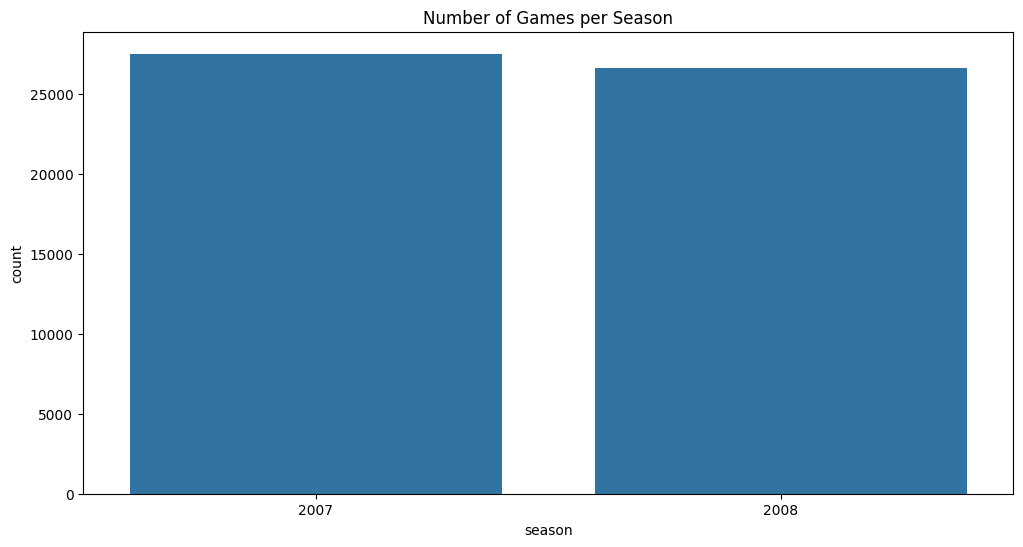

In [30]:
# Check basic info
print(df_train.info())
print(df_train.describe())

# Check for missing values
print(df_train.isnull().sum())

# Visualize distributions
plt.figure(figsize=(12,6))
sns.countplot(data=df_train, x='season')
plt.title('Number of Games per Season')
plt.show()

## Data Preprocessing

In [31]:
# Selecting allowed features
allowed_features = [
    "game",
    "season",
    "home_team",
    "away_team",
    "starting_min",
    "home_0",
    "home_1",
    "home_2",
    "home_3",
    "home_4",
    "away_0",
    "away_1",
    "away_2",
    "away_3",
    "away_4",
]

df_train = df_train[allowed_features]
df_test = df_test[allowed_features]

In [32]:
# Combine train and test data for encoding to ensure all labels are seen
combined_data = pd.concat([df_train, df_test], axis=0)

In [33]:
# Convert categorical columns to string type before encoding
categorical_cols = [
    "game",
    "home_team",
    "away_team",
    "home_0",
    "home_1",
    "home_2",
    "home_3",
    "home_4",
    "away_0",
    "away_1",
    "away_2",
    "away_3",
    "away_4",
]

for col in categorical_cols:
    combined_data[col] = combined_data[col].astype(str)

In [34]:
# Apply Label Encoding
encoder = LabelEncoder()
for col in categorical_cols:
    combined_data[col] = encoder.fit_transform(combined_data[col])

In [35]:
# Split back into train and test sets
df_train = combined_data.iloc[: len(df_train)]
df_test = combined_data.iloc[len(df_train) :]

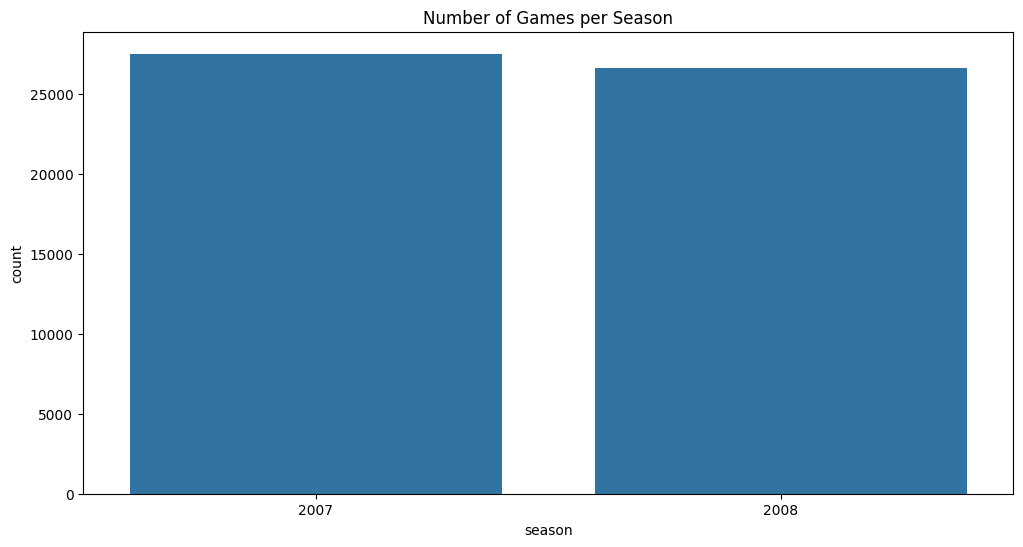

In [36]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x="season")
plt.title("Number of Games per Season")
plt.show()

## Model Training and Evaluation

In [37]:
# Define target variable (predicting home_4, the fifth player in the home lineup)
X_train = df_train.drop(columns=["home_4"])
y_train = df_train["home_4"]
X_test = df_test.drop(columns=["home_4"])
y_test = df_test["home_4"]

In [40]:
# Ensure y_train and y_test are Pandas Series before concatenation
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# Fit LabelEncoder on both train and test labels
encoder_y = LabelEncoder()
encoder_y.fit(pd.concat([y_train, y_test], axis=0))  # Fit on full dataset

# Now transform separately
y_train = encoder_y.transform(y_train)
y_test = encoder_y.transform(y_test)


In [41]:
# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(
    n_estimators=100, use_label_encoder=False, eval_metric="mlogloss", random_state=42
)

In [42]:
# Train models
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
lgb_model.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

LGBMClassifier(random_state=42)

In [44]:
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:59:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
# Make predictions
rf_preds = rf_model.predict(X_test)
lgb_preds = lgb_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

In [46]:
# Evaluate models
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))

Random Forest Accuracy: 0.001009845998485231
LightGBM Accuracy: 0.0022721534965917697
XGBoost Accuracy: 0.005806614491290078


In [47]:
# Classification reports
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("LightGBM Classification Report:\n", classification_report(y_test, lgb_preds))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_preds))

Random Forest Classification Report:
               precision    recall  f1-score   support

           2       0.50      1.00      0.67         2
           6       0.50      0.50      0.50         6
           7       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         9
          25       0.00      0.00      0.00         6
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         6
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         2
          39       0.00      0.00      0.00         2
          41       0.00      0.00      0.00        13
          44       0.00      0.00      0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_